## Visualizations: Histograms/Bar Graphs for Top Viral Songs

In [47]:
%matplotlib inline

In [48]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import time

In [49]:
viral_all_df = pd.read_csv('viral_all.csv')
viral_all_df.head()

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,NaN
2,2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,19FsxZm98evcrjWFFhHnC4,unspecified,NaN,NaN
3,3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap
4,4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,NaN,NaN


In [50]:
new_viral_all_df=viral_all_df.drop(["Unnamed: 0"], axis=1)
new_viral_all_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,NaN
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,19FsxZm98evcrjWFFhHnC4,unspecified,NaN,NaN
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,NaN,NaN


In [51]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('rap|hip hop|trap') | new_viral_all_df['Genre 2'].str.contains('rap|hip hop|trap') | new_viral_all_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('r&b|soul|blues') | new_viral_all_df['Genre 2'].str.contains('r&b|soul|blues') | new_viral_all_df['Genre 3'].str.contains('r&b|soul|blues')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('pop') | new_viral_all_df['Genre 2'].str.contains('pop') | new_viral_all_df['Genre 3'].str.contains('pop')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('rock') | new_viral_all_df['Genre 2'].str.contains('rock') | new_viral_all_df['Genre 3'].str.contains('rock')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('country') | new_viral_all_df['Genre 2'].str.contains('country') | new_viral_all_df['Genre 3'].str.contains('country')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('latin') | new_viral_all_df['Genre 2'].str.contains('latin') | new_viral_all_df['Genre 3'].str.contains('latin')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('disco') | new_viral_all_df['Genre 2'].str.contains('disco') | new_viral_all_df['Genre 3'].str.contains('disco')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('indie') | new_viral_all_df['Genre 2'].str.contains('indie') | new_viral_all_df['Genre 3'].str.contains('indie')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('house|edm') | new_viral_all_df['Genre 2'].str.contains('house|edm') | new_viral_all_df['Genre 3'].str.contains('house|edm')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('alt|alternative') | new_viral_all_df['Genre 2'].str.contains('alt|alternative') | new_viral_all_df['Genre 3'].str.contains('alt|alternative')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('glitchcore') | new_viral_all_df['Genre 2'].str.contains('glitchcore') | new_viral_all_df['Genre 3'].str.contains('glitchcore')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('brooklyn drill') | new_viral_all_df['Genre 2'].str.contains('brooklyn drill') | new_viral_all_df['Genre 3'].str.contains('brooklyn drill')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('halloween') | new_viral_all_df['Genre 2'].str.contains('halloween') | new_viral_all_df['Genre 3'].str.contains('halloween')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('christmas') | new_viral_all_df['Genre 2'].str.contains('christmas') | new_viral_all_df['Genre 3'].str.contains('christmas')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('classical') | new_viral_all_df['Genre 2'].str.contains('classical') | new_viral_all_df['Genre 3'].str.contains('classical')])]
}
all_viral_genre_df = pd.DataFrame(genre_data)
all_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,433
1,R&B/Soul/Blues,111
2,Pop,495
3,Rock,43
4,Country,84


In [52]:
max_count = all_viral_genre_df['Count'].max()
print(max_count)
percent_total_max = (max_count/all_viral_genre_df['Count'].sum())*100
print(percent_total_max)

495
31.54875717017208


In [53]:
all_viral_genre_df['Percent']=(all_viral_genre_df['Count']/all_viral_genre_df['Count'].sum())*100

In [54]:
all_viral_genre_df

,Genre,Count,Percent
0,Rap/Hip Hop/Trap,433,27.597196
1,R&B/Soul/Blues,111,7.074570
2,Pop,495,31.548757
3,Rock,43,2.740599
4,Country,84,5.353728
5,Latin,35,2.230720
6,Disco,2,0.127470
7,Indie,136,8.667941
8,House/EDM,56,3.569152
9,Alternative/Alt,150,9.560229


In [55]:
sorted_all_viral_genre_df = all_viral_genre_df.sort_values('Count', ascending=False)

## Top Viral Genres Distribution Throughout 2020 (Sampled Months)

In [56]:
genres = ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical']
colors = ['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen', 'maroon', 'purple']

In [57]:
genres_all = sorted_all_viral_genre_df['Genre'].tolist()
all_colors = []

for x in genres_all:
    if x == genres[0]:
        all_colors.append(colors[0])
    if x == genres[1]:
        all_colors.append(colors[1])
    if x == genres[2]:
        all_colors.append(colors[2])      
    if x == genres[3]:
        all_colors.append(colors[3]) 
    if x == genres[4]:
        all_colors.append(colors[4])
    if x == genres[5]:
        all_colors.append(colors[5])
    if x == genres[6]:
        all_colors.append(colors[6])
    if x == genres[7]:
        all_colors.append(colors[7]) 
    if x == genres[8]:
        all_colors.append(colors[8])
    if x == genres[9]:
        all_colors.append(colors[9])
    if x == genres[10]:
        all_colors.append(colors[10])
    if x == genres[11]:
        all_colors.append(colors[11])
    if x == genres[12]:
        all_colors.append(colors[12])
    if x == genres[13]:
        all_colors.append(colors[13])
    if x == genres[14]:
        all_colors.append(colors[14])

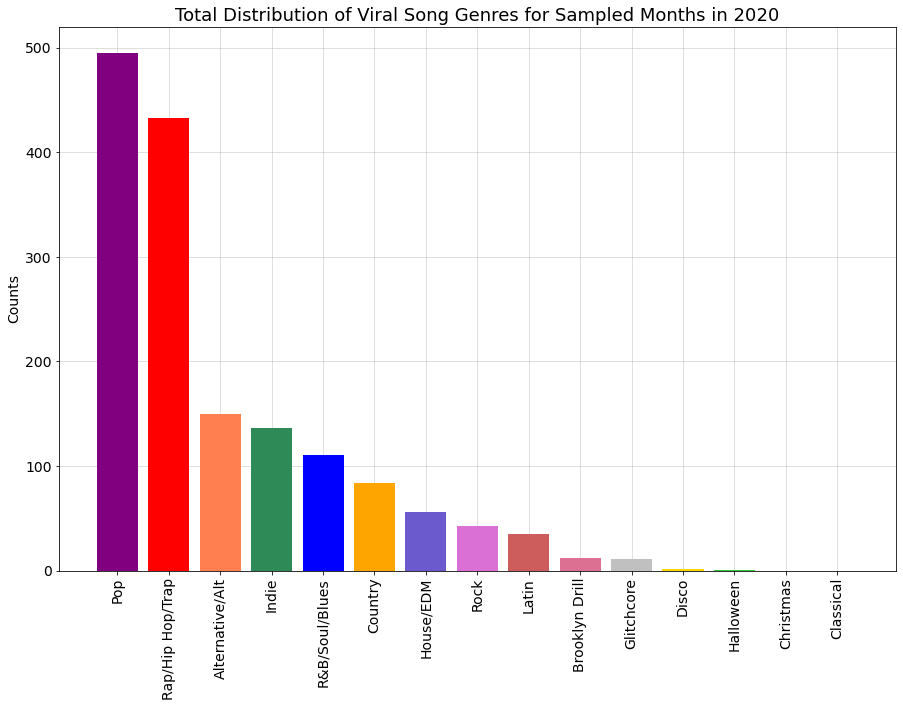

In [58]:
names = sorted_all_viral_genre_df['Genre']
values = sorted_all_viral_genre_df['Count'].astype(float)

plt.bar(names, values, color=all_colors, zorder=2)
plt.xticks(rotation=90, size=14)
plt.grid(alpha=0.5, zorder=0)
plt.yticks(size=14)
plt.ylabel("Counts", size=14)
plt.title("Total Distribution of Viral Song Genres for Sampled Months in 2020", size=18)

plt.gcf().set_size_inches(15,10)
plt.savefig('total_all_viral_genre.jpg', facecolor='w')
plt.show()



## Distribution per Month

### January

In [59]:
jan_df = new_viral_all_df[new_viral_all_df['Month'] == 'January']
jan_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,NaN
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,19FsxZm98evcrjWFFhHnC4,unspecified,NaN,NaN
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,NaN,NaN


In [60]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(jan_df[jan_df['Genre 1'].str.contains('rap|hip hop|trap') | jan_df['Genre 2'].str.contains('rap|hip hop|trap') | jan_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(jan_df[jan_df['Genre 1'].str.contains('r&b|soul|blues') | jan_df['Genre 2'].str.contains('r&b|soul|blues') | jan_df['Genre 3'].str.contains('r&b|soul|blues')]), len(jan_df[jan_df['Genre 1'].str.contains('pop') | jan_df['Genre 2'].str.contains('pop') | jan_df['Genre 3'].str.contains('pop')]), len(jan_df[jan_df['Genre 1'].str.contains('rock') | jan_df['Genre 2'].str.contains('rock') | jan_df['Genre 3'].str.contains('rock')]), len(jan_df[jan_df['Genre 1'].str.contains('country') | jan_df['Genre 2'].str.contains('country') | jan_df['Genre 3'].str.contains('country')]), len(jan_df[jan_df['Genre 1'].str.contains('latin') | jan_df['Genre 2'].str.contains('latin') | jan_df['Genre 3'].str.contains('latin')]), len(jan_df[jan_df['Genre 1'].str.contains('disco') | jan_df['Genre 2'].str.contains('disco') | jan_df['Genre 3'].str.contains('disco')]), len(jan_df[jan_df['Genre 1'].str.contains('indie') | jan_df['Genre 2'].str.contains('indie') | jan_df['Genre 3'].str.contains('indie')]), len(jan_df[jan_df['Genre 1'].str.contains('house|edm') | jan_df['Genre 2'].str.contains('house|edm') | jan_df['Genre 3'].str.contains('house|edm')]), len(jan_df[jan_df['Genre 1'].str.contains('alt|alternative') | jan_df['Genre 2'].str.contains('alt|alternative') | jan_df['Genre 3'].str.contains('alt|alternative')]), len(jan_df[jan_df['Genre 1'].str.contains('glitchcore') | jan_df['Genre 2'].str.contains('glitchcore') | jan_df['Genre 3'].str.contains('glitchcore')]), len(jan_df[jan_df['Genre 1'].str.contains('brooklyn drill') | jan_df['Genre 2'].str.contains('brooklyn drill') | jan_df['Genre 3'].str.contains('brooklyn drill')]), len(jan_df[jan_df['Genre 1'].str.contains('halloween') | jan_df['Genre 2'].str.contains('halloween') | jan_df['Genre 3'].str.contains('halloween')]), len(jan_df[jan_df['Genre 1'].str.contains('christmas') | jan_df['Genre 2'].str.contains('christmas') | jan_df['Genre 3'].str.contains('christmas')]), len(jan_df[jan_df['Genre 1'].str.contains('classical') | jan_df['Genre 2'].str.contains('classical') | jan_df['Genre 3'].str.contains('classical')])]
}
jan_viral_genre_df = pd.DataFrame(genre_data)
jan_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,87
1,R&B/Soul/Blues,22
2,Pop,105
3,Rock,4
4,Country,11


In [61]:
sorted_jan_viral_genre_df = jan_viral_genre_df.sort_values('Count', ascending=False)
sorted_jan_viral_genre_df.head()

,Genre,Count
2,Pop,105
0,Rap/Hip Hop/Trap,87
9,Alternative/Alt,28
1,R&B/Soul/Blues,22
7,Indie,13


### March

In [62]:
mar_df = new_viral_all_df[new_viral_all_df['Month'] == 'March']
mar_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
200,1,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,3O5HD95HTEPgoPFOjAb7yV,viral rap,NaN,NaN
201,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,1lmU3giNF3CSbkVSQmLpHQ,tropical house,NaN,NaN
202,3,Miss Me,Joseph Black,https://open.spotify.com/track/5y6wOadQ0RZfGZk...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,7sPFCTilT1dZsqcDXzOiQf,viral rap,NaN,NaN
203,4,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,6bmlMHgSheBauioMgKv2tn,emo rap,sad rap,NaN
204,5,Supalonely,BENEE,https://open.spotify.com/track/4nK5YrxbMGZstTL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,0Cp8WN4V8Tu4QJQwCN5Md4,alt z,nz pop,pop


In [63]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(mar_df[mar_df['Genre 1'].str.contains('rap|hip hop|trap') | mar_df['Genre 2'].str.contains('rap|hip hop|trap') | mar_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(mar_df[mar_df['Genre 1'].str.contains('r&b|soul|blues') | mar_df['Genre 2'].str.contains('r&b|soul|blues') | mar_df['Genre 3'].str.contains('r&b|soul|blues')]), len(mar_df[mar_df['Genre 1'].str.contains('pop') | mar_df['Genre 2'].str.contains('pop') | mar_df['Genre 3'].str.contains('pop')]), len(mar_df[mar_df['Genre 1'].str.contains('rock') | mar_df['Genre 2'].str.contains('rock') | mar_df['Genre 3'].str.contains('rock')]), len(mar_df[mar_df['Genre 1'].str.contains('country') | mar_df['Genre 2'].str.contains('country') | mar_df['Genre 3'].str.contains('country')]), len(mar_df[mar_df['Genre 1'].str.contains('latin') | mar_df['Genre 2'].str.contains('latin') | mar_df['Genre 3'].str.contains('latin')]), len(mar_df[mar_df['Genre 1'].str.contains('disco') | mar_df['Genre 2'].str.contains('disco') | mar_df['Genre 3'].str.contains('disco')]), len(mar_df[mar_df['Genre 1'].str.contains('indie') | mar_df['Genre 2'].str.contains('indie') | mar_df['Genre 3'].str.contains('indie')]), len(mar_df[mar_df['Genre 1'].str.contains('house|edm') | mar_df['Genre 2'].str.contains('house|edm') | mar_df['Genre 3'].str.contains('house|edm')]), len(mar_df[mar_df['Genre 1'].str.contains('alt|alternative') | mar_df['Genre 2'].str.contains('alt|alternative') | mar_df['Genre 3'].str.contains('alt|alternative')]), len(mar_df[mar_df['Genre 1'].str.contains('glitchcore') | mar_df['Genre 2'].str.contains('glitchcore') | mar_df['Genre 3'].str.contains('glitchcore')]), len(mar_df[mar_df['Genre 1'].str.contains('brooklyn drill') | mar_df['Genre 2'].str.contains('brooklyn drill') | mar_df['Genre 3'].str.contains('brooklyn drill')]), len(mar_df[mar_df['Genre 1'].str.contains('halloween') | mar_df['Genre 2'].str.contains('halloween') | mar_df['Genre 3'].str.contains('halloween')]), len(mar_df[mar_df['Genre 1'].str.contains('christmas') | mar_df['Genre 2'].str.contains('christmas') | mar_df['Genre 3'].str.contains('christmas')]), len(mar_df[mar_df['Genre 1'].str.contains('classical') | mar_df['Genre 2'].str.contains('classical') | mar_df['Genre 3'].str.contains('classical')])]
}
mar_viral_genre_df = pd.DataFrame(genre_data)
mar_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,92
1,R&B/Soul/Blues,25
2,Pop,80
3,Rock,6
4,Country,16


In [64]:
sorted_mar_viral_genre_df = mar_viral_genre_df.sort_values('Count', ascending=False)
sorted_mar_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,92
2,Pop,80
9,Alternative/Alt,27
1,R&B/Soul/Blues,25
4,Country,16


### March

In [65]:
may_df = new_viral_all_df[new_viral_all_df['Month'] == 'May']
may_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
400,1,50//50,Vantage,https://open.spotify.com/track/36lNDeaRf8F8aYa...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,6owH8F2INpb18PhnISiVh2,future funk,NaN,NaN
401,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,1lmU3giNF3CSbkVSQmLpHQ,tropical house,NaN,NaN
402,3,Con Tus Besos,Eslabon Armado,https://open.spotify.com/track/6WYB1odDfMPVMyp...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,0XeEobZplHxzM9QzFQWLiR,corridos tumbados,nuevo regional mexicano,sierreno
403,4,LMK,Lil Xxel,https://open.spotify.com/track/0efL46uAuNEfukX...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,7iDeMFJKjI1ak40N3hoYOZ,pop r&b,NaN,NaN
404,5,Yoga,645AR,https://open.spotify.com/track/2DiybJZJGXyV1UY...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,3Iv3mOsjFV8vZkXphpQ8hz,unspecified,NaN,NaN


In [66]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(may_df[may_df['Genre 1'].str.contains('rap|hip hop|trap') | may_df['Genre 2'].str.contains('rap|hip hop|trap') | may_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(may_df[may_df['Genre 1'].str.contains('r&b|soul|blues') | may_df['Genre 2'].str.contains('r&b|soul|blues') | may_df['Genre 3'].str.contains('r&b|soul|blues')]), len(may_df[may_df['Genre 1'].str.contains('pop') | may_df['Genre 2'].str.contains('pop') | may_df['Genre 3'].str.contains('pop')]), len(may_df[may_df['Genre 1'].str.contains('rock') | may_df['Genre 2'].str.contains('rock') | may_df['Genre 3'].str.contains('rock')]), len(may_df[may_df['Genre 1'].str.contains('country') | may_df['Genre 2'].str.contains('country') | may_df['Genre 3'].str.contains('country')]), len(may_df[may_df['Genre 1'].str.contains('latin') | may_df['Genre 2'].str.contains('latin') | may_df['Genre 3'].str.contains('latin')]), len(may_df[may_df['Genre 1'].str.contains('disco') | may_df['Genre 2'].str.contains('disco') | may_df['Genre 3'].str.contains('disco')]), len(may_df[may_df['Genre 1'].str.contains('indie') | may_df['Genre 2'].str.contains('indie') | may_df['Genre 3'].str.contains('indie')]), len(may_df[may_df['Genre 1'].str.contains('house|edm') | may_df['Genre 2'].str.contains('house|edm') | may_df['Genre 3'].str.contains('house|edm')]), len(may_df[may_df['Genre 1'].str.contains('alt|alternative') | may_df['Genre 2'].str.contains('alt|alternative') | may_df['Genre 3'].str.contains('alt|alternative')]), len(may_df[may_df['Genre 1'].str.contains('glitchcore') | may_df['Genre 2'].str.contains('glitchcore') | may_df['Genre 3'].str.contains('glitchcore')]), len(may_df[may_df['Genre 1'].str.contains('brooklyn drill') | may_df['Genre 2'].str.contains('brooklyn drill') | may_df['Genre 3'].str.contains('brooklyn drill')]), len(may_df[may_df['Genre 1'].str.contains('halloween') | may_df['Genre 2'].str.contains('halloween') | may_df['Genre 3'].str.contains('halloween')]), len(may_df[may_df['Genre 1'].str.contains('christmas') | may_df['Genre 2'].str.contains('christmas') | may_df['Genre 3'].str.contains('christmas')]), len(may_df[may_df['Genre 1'].str.contains('classical') | may_df['Genre 2'].str.contains('classical') | may_df['Genre 3'].str.contains('classical')])]
}
may_viral_genre_df = pd.DataFrame(genre_data)
may_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,59
1,R&B/Soul/Blues,19
2,Pop,75
3,Rock,10
4,Country,21


In [67]:
sorted_may_viral_genre_df = may_viral_genre_df.sort_values('Count', ascending=False)
sorted_may_viral_genre_df.head()

,Genre,Count
2,Pop,75
0,Rap/Hip Hop/Trap,59
9,Alternative/Alt,28
7,Indie,24
4,Country,21


### July

In [68]:
jul_df = new_viral_all_df[new_viral_all_df['Month'] == 'July']
jul_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
600,1,I See Red,Everybody Loves an Outlaw,https://open.spotify.com/track/2Xau3uNsnIb9Fwz...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,5RCWMaArEntbkeWYVxCiFW,modern blues rock,NaN,NaN
601,2,Then Leave (feat. Queendom Come),BeatKing,https://open.spotify.com/track/2Xoc4gqPbBa3QHK...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,5L8p9kDnX2cgoI8VLUL2p4,houston rap,NaN,NaN
602,3,Stunnin' (feat. Harm Franklin),Curtis Waters,https://open.spotify.com/track/2D0dj3hVkRQJCp6...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,2JbE7jUIGtpXSzytnyMg6U,unspecified,NaN,NaN
603,4,Hood Baby,KBFR,https://open.spotify.com/track/5au5NgWCdev4WeL...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,0JFjWic1b9Mvv7WcNYhDvZ,viral rap,NaN,NaN
604,5,Hard For Me,Michele Morrone,https://open.spotify.com/track/00PesUdTmC3Y5xt...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,03fLoIOO015incUitpfkad,unspecified,NaN,NaN


In [69]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(jul_df[jul_df['Genre 1'].str.contains('rap|hip hop|trap') | jul_df['Genre 2'].str.contains('rap|hip hop|trap') | jul_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(jul_df[jul_df['Genre 1'].str.contains('r&b|soul|blues') | jul_df['Genre 2'].str.contains('r&b|soul|blues') | jul_df['Genre 3'].str.contains('r&b|soul|blues')]), len(jul_df[jul_df['Genre 1'].str.contains('pop') | jul_df['Genre 2'].str.contains('pop') | jul_df['Genre 3'].str.contains('pop')]), len(jul_df[jul_df['Genre 1'].str.contains('rock') | jul_df['Genre 2'].str.contains('rock') | jul_df['Genre 3'].str.contains('rock')]), len(jul_df[jul_df['Genre 1'].str.contains('country') | jul_df['Genre 2'].str.contains('country') | jul_df['Genre 3'].str.contains('country')]), len(jul_df[jul_df['Genre 1'].str.contains('latin') | jul_df['Genre 2'].str.contains('latin') | jul_df['Genre 3'].str.contains('latin')]), len(jul_df[jul_df['Genre 1'].str.contains('disco') | jul_df['Genre 2'].str.contains('disco') | jul_df['Genre 3'].str.contains('disco')]), len(jul_df[jul_df['Genre 1'].str.contains('indie') | jul_df['Genre 2'].str.contains('indie') | jul_df['Genre 3'].str.contains('indie')]), len(jul_df[jul_df['Genre 1'].str.contains('house|edm') | jul_df['Genre 2'].str.contains('house|edm') | jul_df['Genre 3'].str.contains('house|edm')]), len(jul_df[jul_df['Genre 1'].str.contains('alt|alternative') | jul_df['Genre 2'].str.contains('alt|alternative') | jul_df['Genre 3'].str.contains('alt|alternative')]), len(jul_df[jul_df['Genre 1'].str.contains('glitchcore') | jul_df['Genre 2'].str.contains('glitchcore') | jul_df['Genre 3'].str.contains('glitchcore')]), len(jul_df[jul_df['Genre 1'].str.contains('brooklyn drill') | jul_df['Genre 2'].str.contains('brooklyn drill') | jul_df['Genre 3'].str.contains('brooklyn drill')]), len(jul_df[jul_df['Genre 1'].str.contains('halloween') | jul_df['Genre 2'].str.contains('halloween') | jul_df['Genre 3'].str.contains('halloween')]), len(jul_df[jul_df['Genre 1'].str.contains('christmas') | jul_df['Genre 2'].str.contains('christmas') | jul_df['Genre 3'].str.contains('christmas')]), len(jul_df[jul_df['Genre 1'].str.contains('classical') | jul_df['Genre 2'].str.contains('classical') | jul_df['Genre 3'].str.contains('classical')])]
}
jul_viral_genre_df = pd.DataFrame(genre_data)
jul_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,62
1,R&B/Soul/Blues,18
2,Pop,73
3,Rock,9
4,Country,8


In [70]:
sorted_jul_viral_genre_df = jul_viral_genre_df.sort_values('Count', ascending=False)
sorted_jul_viral_genre_df.head()

,Genre,Count
2,Pop,73
0,Rap/Hip Hop/Trap,62
7,Indie,28
9,Alternative/Alt,20
1,R&B/Soul/Blues,18


### September

In [71]:
sep_df = new_viral_all_df[new_viral_all_df['Month'] == 'September']
sep_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
800,1,Mad at Disney,salem ilese,https://open.spotify.com/track/7aGyRfJWtLqgJaZ...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3QJUFtGBGL05vo0kCJZsmT,alt z,modern indie pop,social media pop
801,2,WAP (feat. Megan Thee Stallion),Cardi B,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,4kYSro6naA4h99UJvo89HB,pop,pop rap,post-teen pop
802,3,Mood (feat. iann dior),24kGoldn,https://open.spotify.com/track/3tjFYV6RSFtuktY...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,6fWVd57NKTalqvmjRd2t8Z,cali rap,NaN,NaN
803,4,3 Musketeers,NextYoungin,https://open.spotify.com/track/57Oi4yqY27uJzCy...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,2u1aL8XADqj0nJFHMKRjNw,viral rap,NaN,NaN
804,5,Backyard Boy,Claire Rosinkranz,https://open.spotify.com/track/0QpOqKz66ZxHNqj...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3V0ZQW0dNuVaFtbVYgSI24,modern indie pop,NaN,NaN


In [72]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(sep_df[sep_df['Genre 1'].str.contains('rap|hip hop|trap') | sep_df['Genre 2'].str.contains('rap|hip hop|trap') | sep_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(sep_df[sep_df['Genre 1'].str.contains('r&b|soul|blues') | sep_df['Genre 2'].str.contains('r&b|soul|blues') | sep_df['Genre 3'].str.contains('r&b|soul|blues')]), len(sep_df[sep_df['Genre 1'].str.contains('pop') | sep_df['Genre 2'].str.contains('pop') | sep_df['Genre 3'].str.contains('pop')]), len(sep_df[sep_df['Genre 1'].str.contains('rock') | sep_df['Genre 2'].str.contains('rock') | sep_df['Genre 3'].str.contains('rock')]), len(sep_df[sep_df['Genre 1'].str.contains('country') | sep_df['Genre 2'].str.contains('country') | sep_df['Genre 3'].str.contains('country')]), len(sep_df[sep_df['Genre 1'].str.contains('latin') | sep_df['Genre 2'].str.contains('latin') | sep_df['Genre 3'].str.contains('latin')]), len(sep_df[sep_df['Genre 1'].str.contains('disco') | sep_df['Genre 2'].str.contains('disco') | sep_df['Genre 3'].str.contains('disco')]), len(sep_df[sep_df['Genre 1'].str.contains('indie') | sep_df['Genre 2'].str.contains('indie') | sep_df['Genre 3'].str.contains('indie')]), len(sep_df[sep_df['Genre 1'].str.contains('house|edm') | sep_df['Genre 2'].str.contains('house|edm') | sep_df['Genre 3'].str.contains('house|edm')]), len(sep_df[sep_df['Genre 1'].str.contains('alt|alternative') | sep_df['Genre 2'].str.contains('alt|alternative') | sep_df['Genre 3'].str.contains('alt|alternative')]), len(sep_df[sep_df['Genre 1'].str.contains('glitchcore') | sep_df['Genre 2'].str.contains('glitchcore') | sep_df['Genre 3'].str.contains('glitchcore')]), len(sep_df[sep_df['Genre 1'].str.contains('brooklyn drill') | sep_df['Genre 2'].str.contains('brooklyn drill') | sep_df['Genre 3'].str.contains('brooklyn drill')]), len(sep_df[sep_df['Genre 1'].str.contains('halloween') | sep_df['Genre 2'].str.contains('halloween') | sep_df['Genre 3'].str.contains('halloween')]), len(sep_df[sep_df['Genre 1'].str.contains('christmas') | sep_df['Genre 2'].str.contains('christmas') | sep_df['Genre 3'].str.contains('christmas')]), len(sep_df[sep_df['Genre 1'].str.contains('classical') | sep_df['Genre 2'].str.contains('classical') | sep_df['Genre 3'].str.contains('classical')])]
}
sep_viral_genre_df = pd.DataFrame(genre_data)
sep_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,65
1,R&B/Soul/Blues,7
2,Pop,110
3,Rock,5
4,Country,22


In [73]:
sorted_sep_viral_genre_df = sep_viral_genre_df.sort_values('Count', ascending=False)
sorted_sep_viral_genre_df.head()

,Genre,Count
2,Pop,110
0,Rap/Hip Hop/Trap,65
9,Alternative/Alt,31
7,Indie,30
4,Country,22


### November

In [74]:
nov_df = new_viral_all_df[new_viral_all_df['Month'] == 'November']
nov_df.head()


,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
1000,1,E-GIRLS ARE RUINING MY LIFE!,CORPSE,https://open.spotify.com/track/7bCfHiRcfUjG0YV...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,7yntSJ6uojO3z6GFUVwhAW,viral rap,NaN,NaN
1001,2,Trump Is Your President,Bryson Gray,https://open.spotify.com/track/3PdQfXbIuEjUoNl...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,66pGC6EHiiLr7Ce6twM5bk,unspecified,NaN,NaN
1002,3,Die Very Rough,Mario Judah,https://open.spotify.com/track/1AyrLa7PkFQvt1A...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,5HFSWl4JPwju06kHxukvTe,meme rap,NaN,NaN
1003,4,Touch You,遠野高志,https://open.spotify.com/track/6qWEpnyU43Bcrx3...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,01ACNPPnzgrwcqlbX6eo3x,unspecified,NaN,NaN
1004,5,Monster Mash,"Bobby ""Boris"" Pickett",https://open.spotify.com/track/0xxZY5C9xxij3D1...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,42MRYPhQfcEXqb18dl5ERX,halloween,novelty,NaN


In [75]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(nov_df[nov_df['Genre 1'].str.contains('rap|hip hop|trap') | nov_df['Genre 2'].str.contains('rap|hip hop|trap') | nov_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(nov_df[nov_df['Genre 1'].str.contains('r&b|soul|blues') | nov_df['Genre 2'].str.contains('r&b|soul|blues') | nov_df['Genre 3'].str.contains('r&b|soul|blues')]), len(nov_df[nov_df['Genre 1'].str.contains('pop') | nov_df['Genre 2'].str.contains('pop') | nov_df['Genre 3'].str.contains('pop')]), len(nov_df[nov_df['Genre 1'].str.contains('rock') | nov_df['Genre 2'].str.contains('rock') | nov_df['Genre 3'].str.contains('rock')]), len(nov_df[nov_df['Genre 1'].str.contains('country') | nov_df['Genre 2'].str.contains('country') | nov_df['Genre 3'].str.contains('country')]), len(nov_df[nov_df['Genre 1'].str.contains('latin') | nov_df['Genre 2'].str.contains('latin') | nov_df['Genre 3'].str.contains('latin')]), len(nov_df[nov_df['Genre 1'].str.contains('disco') | nov_df['Genre 2'].str.contains('disco') | nov_df['Genre 3'].str.contains('disco')]), len(nov_df[nov_df['Genre 1'].str.contains('indie') | nov_df['Genre 2'].str.contains('indie') | nov_df['Genre 3'].str.contains('indie')]), len(nov_df[nov_df['Genre 1'].str.contains('house|edm') | nov_df['Genre 2'].str.contains('house|edm') | nov_df['Genre 3'].str.contains('house|edm')]), len(nov_df[nov_df['Genre 1'].str.contains('alt|alternative') | nov_df['Genre 2'].str.contains('alt|alternative') | nov_df['Genre 3'].str.contains('alt|alternative')]), len(nov_df[nov_df['Genre 1'].str.contains('glitchcore') | nov_df['Genre 2'].str.contains('glitchcore') | nov_df['Genre 3'].str.contains('glitchcore')]), len(nov_df[nov_df['Genre 1'].str.contains('brooklyn drill') | nov_df['Genre 2'].str.contains('brooklyn drill') | nov_df['Genre 3'].str.contains('brooklyn drill')]), len(nov_df[nov_df['Genre 1'].str.contains('halloween') | nov_df['Genre 2'].str.contains('halloween') | nov_df['Genre 3'].str.contains('halloween')]), len(nov_df[nov_df['Genre 1'].str.contains('christmas') | nov_df['Genre 2'].str.contains('christmas') | nov_df['Genre 3'].str.contains('christmas')]), len(nov_df[nov_df['Genre 1'].str.contains('classical') | nov_df['Genre 2'].str.contains('classical') | nov_df['Genre 3'].str.contains('classical')])]
}
nov_viral_genre_df = pd.DataFrame(genre_data)
nov_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,68
1,R&B/Soul/Blues,20
2,Pop,52
3,Rock,9
4,Country,6


In [76]:
sorted_nov_viral_genre_df = nov_viral_genre_df.sort_values('Count', ascending=False)
sorted_nov_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,68
2,Pop,52
7,Indie,25
1,R&B/Soul/Blues,20
9,Alternative/Alt,16


In [77]:
sorted_jan_viral_genre_df["Colors"] = ""
sorted_jan_viral_genre_df

,Genre,Count,Colors
2,Pop,105,
0,Rap/Hip Hop/Trap,87,
9,Alternative/Alt,28,
1,R&B/Soul/Blues,22,
7,Indie,13,
4,Country,11,
5,Latin,7,
8,House/EDM,5,
3,Rock,4,
6,Disco,0,


In [78]:
sorted_jan_viral_genre_df.dtypes

Genre     object
Count      int64
Colors    object
dtype: object

In [79]:
genres = ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical']
colors = ['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen', 'maroon', 'purple']

In [80]:
genres_jan = sorted_jan_viral_genre_df['Genre'].tolist()
jan_colors = []

for x in genres_jan:
    if x == genres[0]:
        jan_colors.append(colors[0])
    if x == genres[1]:
        jan_colors.append(colors[1])
    if x == genres[2]:
        jan_colors.append(colors[2])      
    if x == genres[3]:
        jan_colors.append(colors[3]) 
    if x == genres[4]:
        jan_colors.append(colors[4])
    if x == genres[5]:
        jan_colors.append(colors[5])
    if x == genres[6]:
        jan_colors.append(colors[6])
    if x == genres[7]:
        jan_colors.append(colors[7]) 
    if x == genres[8]:
        jan_colors.append(colors[8])
    if x == genres[9]:
        jan_colors.append(colors[9])
    if x == genres[10]:
        jan_colors.append(colors[10])
    if x == genres[11]:
        jan_colors.append(colors[11])
    if x == genres[12]:
        jan_colors.append(colors[12])
    if x == genres[13]:
        jan_colors.append(colors[13])
    if x == genres[14]:
        jan_colors.append(colors[14])
                    

In [81]:
genres_mar = sorted_mar_viral_genre_df['Genre'].tolist()
mar_colors = []

for x in genres_mar:
    if x == genres[0]:
        mar_colors.append(colors[0])
    if x == genres[1]:
        mar_colors.append(colors[1])
    if x == genres[2]:
        mar_colors.append(colors[2])      
    if x == genres[3]:
        mar_colors.append(colors[3]) 
    if x == genres[4]:
        mar_colors.append(colors[4])
    if x == genres[5]:
        mar_colors.append(colors[5])
    if x == genres[6]:
        mar_colors.append(colors[6])
    if x == genres[7]:
        mar_colors.append(colors[7]) 
    if x == genres[8]:
        mar_colors.append(colors[8])
    if x == genres[9]:
        mar_colors.append(colors[9])
    if x == genres[10]:
        mar_colors.append(colors[10])
    if x == genres[11]:
        mar_colors.append(colors[11])
    if x == genres[12]:
        mar_colors.append(colors[12])
    if x == genres[13]:
        mar_colors.append(colors[13])
    if x == genres[14]:
        mar_colors.append(colors[14])

In [82]:
genres_may = sorted_may_viral_genre_df['Genre'].tolist()
may_colors = []

for x in genres_may:
    if x == genres[0]:
        may_colors.append(colors[0])
    if x == genres[1]:
        may_colors.append(colors[1])
    if x == genres[2]:
        may_colors.append(colors[2])      
    if x == genres[3]:
        may_colors.append(colors[3]) 
    if x == genres[4]:
        may_colors.append(colors[4])
    if x == genres[5]:
        may_colors.append(colors[5])
    if x == genres[6]:
        may_colors.append(colors[6])
    if x == genres[7]:
        may_colors.append(colors[7]) 
    if x == genres[8]:
        may_colors.append(colors[8])
    if x == genres[9]:
        may_colors.append(colors[9])
    if x == genres[10]:
        may_colors.append(colors[10])
    if x == genres[11]:
        may_colors.append(colors[11])
    if x == genres[12]:
        may_colors.append(colors[12])
    if x == genres[13]:
        may_colors.append(colors[13])
    if x == genres[14]:
        may_colors.append(colors[14])

In [83]:
genres_jul = sorted_jul_viral_genre_df['Genre'].tolist()
jul_colors = []

for x in genres_jul:
    if x == genres[0]:
        jul_colors.append(colors[0])
    if x == genres[1]:
        jul_colors.append(colors[1])
    if x == genres[2]:
        jul_colors.append(colors[2])      
    if x == genres[3]:
        jul_colors.append(colors[3]) 
    if x == genres[4]:
        jul_colors.append(colors[4])
    if x == genres[5]:
        jul_colors.append(colors[5])
    if x == genres[6]:
        jul_colors.append(colors[6])
    if x == genres[7]:
        jul_colors.append(colors[7]) 
    if x == genres[8]:
        jul_colors.append(colors[8])
    if x == genres[9]:
        jul_colors.append(colors[9])
    if x == genres[10]:
        jul_colors.append(colors[10])
    if x == genres[11]:
        jul_colors.append(colors[11])
    if x == genres[12]:
        jul_colors.append(colors[12])
    if x == genres[13]:
        jul_colors.append(colors[13])
    if x == genres[14]:
        jul_colors.append(colors[14])

In [84]:
genres_sep = sorted_sep_viral_genre_df['Genre'].tolist()
sep_colors = []

for x in genres_sep:
    if x == genres[0]:
        sep_colors.append(colors[0])
    if x == genres[1]:
        sep_colors.append(colors[1])
    if x == genres[2]:
        sep_colors.append(colors[2])      
    if x == genres[3]:
        sep_colors.append(colors[3]) 
    if x == genres[4]:
        sep_colors.append(colors[4])
    if x == genres[5]:
        sep_colors.append(colors[5])
    if x == genres[6]:
        sep_colors.append(colors[6])
    if x == genres[7]:
        sep_colors.append(colors[7]) 
    if x == genres[8]:
        sep_colors.append(colors[8])
    if x == genres[9]:
        sep_colors.append(colors[9])
    if x == genres[10]:
        sep_colors.append(colors[10])
    if x == genres[11]:
        sep_colors.append(colors[11])
    if x == genres[12]:
        sep_colors.append(colors[12])
    if x == genres[13]:
        sep_colors.append(colors[13])
    if x == genres[14]:
        sep_colors.append(colors[14])

In [85]:
genres_nov = sorted_nov_viral_genre_df['Genre'].tolist()
nov_colors = []

for x in genres_nov:
    if x == genres[0]:
        nov_colors.append(colors[0])
    if x == genres[1]:
        nov_colors.append(colors[1])
    if x == genres[2]:
        nov_colors.append(colors[2])      
    if x == genres[3]:
        nov_colors.append(colors[3]) 
    if x == genres[4]:
        nov_colors.append(colors[4])
    if x == genres[5]:
        nov_colors.append(colors[5])
    if x == genres[6]:
        nov_colors.append(colors[6])
    if x == genres[7]:
        nov_colors.append(colors[7]) 
    if x == genres[8]:
        nov_colors.append(colors[8])
    if x == genres[9]:
        nov_colors.append(colors[9])
    if x == genres[10]:
        nov_colors.append(colors[10])
    if x == genres[11]:
        nov_colors.append(colors[11])
    if x == genres[12]:
        nov_colors.append(colors[12])
    if x == genres[13]:
        nov_colors.append(colors[13])
    if x == genres[14]:
        nov_colors.append(colors[14])

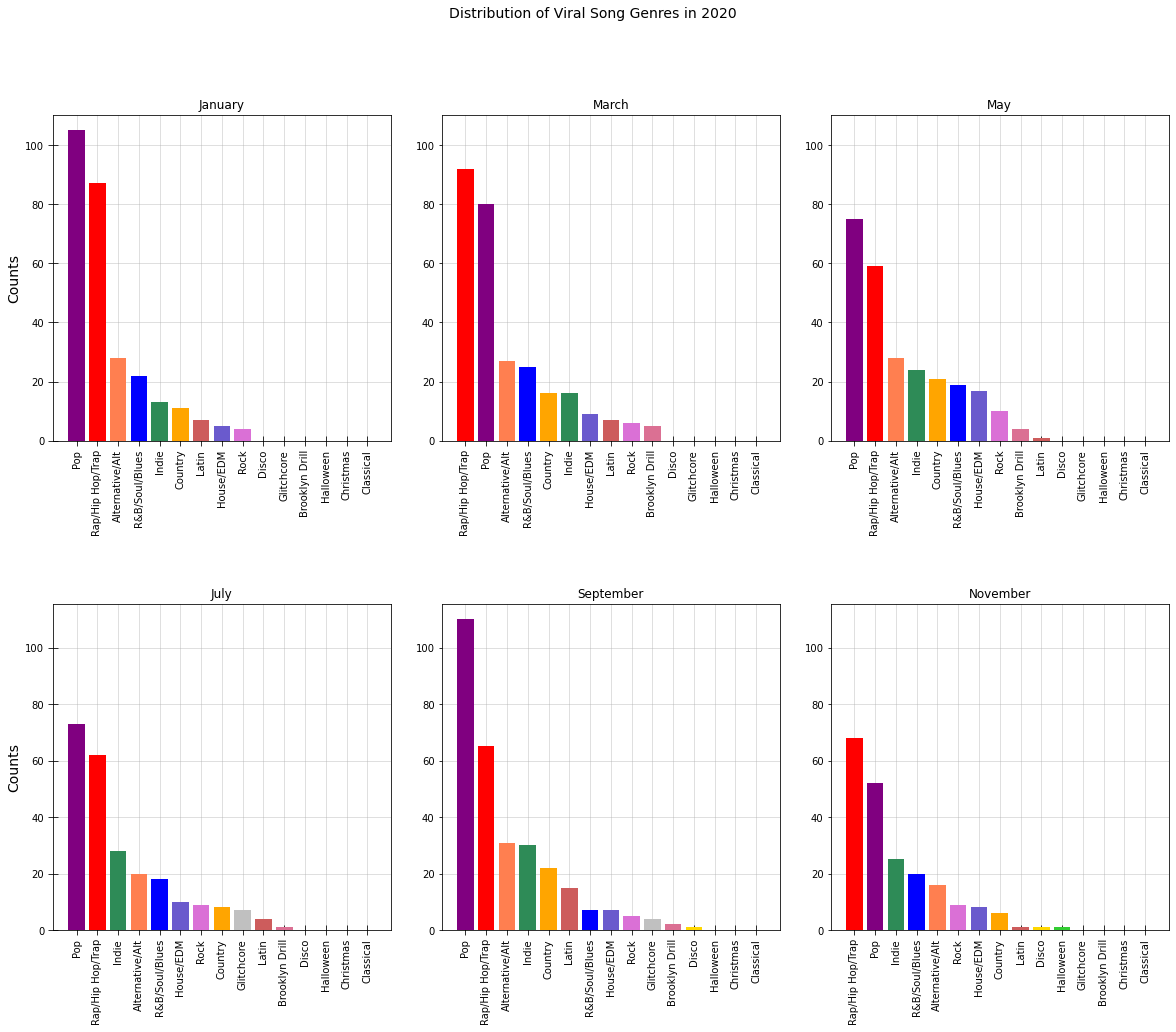

In [261]:
jan_x = sorted_jan_viral_genre_df['Genre']
jan_y = sorted_jan_viral_genre_df['Count']

mar_x = sorted_mar_viral_genre_df['Genre']
mar_y = sorted_mar_viral_genre_df['Count']

may_x = sorted_may_viral_genre_df['Genre']
may_y = sorted_may_viral_genre_df['Count']

jul_x = sorted_jul_viral_genre_df['Genre']
jul_y = sorted_jul_viral_genre_df['Count']

sep_x = sorted_sep_viral_genre_df['Genre']
sep_y = sorted_sep_viral_genre_df['Count']

nov_x = sorted_nov_viral_genre_df['Genre']
nov_y = sorted_nov_viral_genre_df['Count']

# fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(2,3, sharey=True)
fig = plt.figure(figsize = (20, 15))
fig.add_axes()

ax1 = fig.add_subplot(231)
ax1.bar(jan_x, jan_y, color=jan_colors, zorder=2)
ax1.grid(alpha=0.5, zorder=0)
ax1.xaxis.set(ticks=range(len(jan_x)))
# ax1.setxticklabels(jan_x, rotation=90)
ax1.tick_params(axis='y', direction='inout', length=10)
ax1.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax1.set(title="January")
# ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylabel('Counts', fontsize=14)

ax2 = fig.add_subplot(232, sharey=ax1)
ax2.bar(mar_x, mar_y, color=mar_colors, zorder=2)
ax2.grid(alpha=0.5, zorder=0)
ax2.xaxis.set(ticks=range(len(mar_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax2.tick_params(axis='y', direction='inout', length=10)
ax2.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax2.set(title="March")
# ax2.set_xlabel('Genre', fontsize=14)
# ax2.set_ylabel('Counts', fontsize=14)


ax3 = fig.add_subplot(233, sharey=ax1)
ax3.bar(may_x, may_y, color=may_colors, zorder=2)
ax3.grid(alpha=0.5, zorder=0)
ax3.xaxis.set(ticks=range(len(may_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax3.tick_params(axis='y', direction='inout', length=10)
ax3.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax3.set(title="May")
# ax3.set_xlabel('Genre', fontsize=14)
# ax3.set_ylabel('Counts', fontsize=14)


ax4 = fig.add_subplot(234)
ax4.bar(jul_x, jul_y, color=jul_colors, zorder=2)
ax4.grid(alpha=0.5, zorder=0)
ax4.xaxis.set(ticks=range(len(jul_x)))
# ax1.setxticklabels(jan_x, rotation=90)
ax4.tick_params(axis='y', direction='inout', length=10)
ax4.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax4.set(title="July")
# ax4.set_xlabel('Genre', fontsize=14)
ax4.set_ylabel('Counts', fontsize=14)


ax5 = fig.add_subplot(235, sharey=ax4)
ax5.bar(sep_x, sep_y, color=sep_colors, zorder=2)
ax5.grid(alpha=0.5, zorder=0)
ax5.xaxis.set(ticks=range(len(sep_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax5.tick_params(axis='y', direction='inout', length=10)
ax5.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax5.set(title="September")
# ax5.set_xlabel('Genre', fontsize=14)
# ax5.set_ylabel('Counts', fontsize=14)


ax6 = fig.add_subplot(236, sharey=ax4)
ax6.bar(nov_x, nov_y, color=nov_colors, zorder=2)
ax6.grid(alpha=0.5, zorder=0)
ax6.xaxis.set(ticks=range(len(nov_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax6.tick_params(axis='y', direction='inout', length=10)
ax6.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax6.set(title="November")
# ax6.set_xlabel('Genre', fontsize=12)
# ax6.set_ylabel('Counts', fontsize=14)

fig.suptitle('Distribution of Viral Song Genres in 2020', fontsize=14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.5)
# plt.bar(names, values, color=['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen'], zorder=2)
# plt.xticks(rotation=90, size=14)
# plt.grid(alpha=0.5, zorder=0)
# plt.yticks(size=14)
# plt.ylabel("Counts", size=14)
# plt.title("Total Distribution of Viral Song Genres for Sampled Months in 2020", size=18)
# plt.setp(axa.xaxis.get_majorticklabels(), rotation=95)
# plt.subplot(221)

plt.gcf()
plt.show()
fig.savefig('total_months_viral_genre.jpg', facecolor='w', dpi=400)

In [87]:
pd.options.plotting.backend = "plotly"

jan = sorted_jan_viral_genre_df['Count'].tolist()
mar = sorted_mar_viral_genre_df['Count'].tolist()
may = sorted_may_viral_genre_df['Count'].tolist()


df = pd.DataFrame(dict(Jan=jan, Mar=mar, May=may))
fig = df.plot.bar()
fig.show()

## UI Data

In [101]:
ui_df = pd.read_csv('UI_weekly_2020.csv', skiprows=[0,1],skip_blank_lines=True, skipinitialspace=True)
ui_df.head()

,Unnamed: 0,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A.1,S.F..1,S.A..1,S.A. 4-Week.1,N.S.A.2,S.A..2,Unnamed: 11
0,1/4/20,"335,294",159.4,"210,000","218,250","2,249,369",127.4,"1,766,000","1,747,000",1.5,1.2,"145,230,691"
1,1/11/20,"337,798",164.1,"206,000","213,000","2,140,671",123.1,"1,739,000","1,752,250",1.5,1.2,"145,230,691"
2,1/18/20,"281,558",128.4,"219,000","213,250","2,080,430",121.7,"1,709,000","1,748,250",1.4,1.2,"145,230,691"
3,1/25/20,"228,352",108.7,"210,000","211,250","2,153,585",122.9,"1,752,000","1,741,500",1.5,1.2,"145,230,691"
4,2/1/20,"224,543",109.3,"205,000","210,000","2,087,362",122.9,"1,698,000","1,724,500",1.4,1.2,"145,230,691"


In [102]:
ui_df = ui_df.rename(columns={'Unnamed: 0': "Date"})
ui_df.head()

,Date,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A.1,S.F..1,S.A..1,S.A. 4-Week.1,N.S.A.2,S.A..2,Unnamed: 11
0,1/4/20,"335,294",159.4,"210,000","218,250","2,249,369",127.4,"1,766,000","1,747,000",1.5,1.2,"145,230,691"
1,1/11/20,"337,798",164.1,"206,000","213,000","2,140,671",123.1,"1,739,000","1,752,250",1.5,1.2,"145,230,691"
2,1/18/20,"281,558",128.4,"219,000","213,250","2,080,430",121.7,"1,709,000","1,748,250",1.4,1.2,"145,230,691"
3,1/25/20,"228,352",108.7,"210,000","211,250","2,153,585",122.9,"1,752,000","1,741,500",1.5,1.2,"145,230,691"
4,2/1/20,"224,543",109.3,"205,000","210,000","2,087,362",122.9,"1,698,000","1,724,500",1.4,1.2,"145,230,691"


In [100]:
ui_df.convert_dtypes(infer_objects=True, convert_integer=True)

,Date,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A.1,S.F..1,S.A..1,S.A. 4-Week.1,N.S.A.2,S.A..2,Unnamed: 11
0,1/4/20,"335,294",159.4,"210,000","218,250","2,249,369",127.4,"1,766,000","1,747,000",1.5,1.2,"145,230,691"
1,1/11/20,"337,798",164.1,"206,000","213,000","2,140,671",123.1,"1,739,000","1,752,250",1.5,1.2,"145,230,691"
2,1/18/20,"281,558",128.4,"219,000","213,250","2,080,430",121.7,"1,709,000","1,748,250",1.4,1.2,"145,230,691"
3,1/25/20,"228,352",108.7,"210,000","211,250","2,153,585",122.9,"1,752,000","1,741,500",1.5,1.2,"145,230,691"
4,2/1/20,"224,543",109.3,"205,000","210,000","2,087,362",122.9,"1,698,000","1,724,500",1.4,1.2,"145,230,691"
5,2/8/20,"219,404",106.1,"207,000","210,250","2,099,321",121.1,"1,734,000","1,723,250",1.4,1.2,"145,230,691"
6,2/15/20,"209,179",97.5,"215,000","209,250","2,061,355",120.9,"1,705,000","1,722,250",1.4,1.2,"145,230,691"
7,2/22/20,"198,832",91.1,"218,000","211,250","2,103,447",121.6,"1,730,000","1,716,750",1.4,1.2,"145,230,691"
8,2/29/20,"216,605",100.2,"216,000","214,000","2,055,156",120.3,"1,708,000","1,719,250",1.4,1.2,"145,230,691"
9,3/7/20,"199,885",94.4,"212,000","215,250","1,977,242",115.3,"1,715,000","1,714,500",1.4,1.2,"145,230,691"


In [106]:
ui_df_dropped = ui_df.dropna(how='all')
ui_df_dropped.apply(pd.to_numeric, errors='coerce')
ui_df_dropped

,Date,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A.1,S.F..1,S.A..1,S.A. 4-Week.1,N.S.A.2,S.A..2,Unnamed: 11
0,1/4/20,"335,294",159.4,"210,000","218,250","2,249,369",127.4,"1,766,000","1,747,000",1.5,1.2,"145,230,691"
1,1/11/20,"337,798",164.1,"206,000","213,000","2,140,671",123.1,"1,739,000","1,752,250",1.5,1.2,"145,230,691"
2,1/18/20,"281,558",128.4,"219,000","213,250","2,080,430",121.7,"1,709,000","1,748,250",1.4,1.2,"145,230,691"
3,1/25/20,"228,352",108.7,"210,000","211,250","2,153,585",122.9,"1,752,000","1,741,500",1.5,1.2,"145,230,691"
4,2/1/20,"224,543",109.3,"205,000","210,000","2,087,362",122.9,"1,698,000","1,724,500",1.4,1.2,"145,230,691"
5,2/8/20,"219,404",106.1,"207,000","210,250","2,099,321",121.1,"1,734,000","1,723,250",1.4,1.2,"145,230,691"
6,2/15/20,"209,179",97.5,"215,000","209,250","2,061,355",120.9,"1,705,000","1,722,250",1.4,1.2,"145,230,691"
7,2/22/20,"198,832",91.1,"218,000","211,250","2,103,447",121.6,"1,730,000","1,716,750",1.4,1.2,"145,230,691"
8,2/29/20,"216,605",100.2,"216,000","214,000","2,055,156",120.3,"1,708,000","1,719,250",1.4,1.2,"145,230,691"
9,3/7/20,"199,885",94.4,"212,000","215,250","1,977,242",115.3,"1,715,000","1,714,500",1.4,1.2,"145,230,691"


In [111]:
ui2_df_dropped = ui_df_dropped[(ui_df_dropped.Date != 'Run Date: 4/28/2021')]
ui2_df_dropped

,Date,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A.1,S.F..1,S.A..1,S.A. 4-Week.1,N.S.A.2,S.A..2,Unnamed: 11
0,1/4/20,"335,294",159.4,"210,000","218,250","2,249,369",127.4,"1,766,000","1,747,000",1.5,1.2,"145,230,691"
1,1/11/20,"337,798",164.1,"206,000","213,000","2,140,671",123.1,"1,739,000","1,752,250",1.5,1.2,"145,230,691"
2,1/18/20,"281,558",128.4,"219,000","213,250","2,080,430",121.7,"1,709,000","1,748,250",1.4,1.2,"145,230,691"
3,1/25/20,"228,352",108.7,"210,000","211,250","2,153,585",122.9,"1,752,000","1,741,500",1.5,1.2,"145,230,691"
4,2/1/20,"224,543",109.3,"205,000","210,000","2,087,362",122.9,"1,698,000","1,724,500",1.4,1.2,"145,230,691"
5,2/8/20,"219,404",106.1,"207,000","210,250","2,099,321",121.1,"1,734,000","1,723,250",1.4,1.2,"145,230,691"
6,2/15/20,"209,179",97.5,"215,000","209,250","2,061,355",120.9,"1,705,000","1,722,250",1.4,1.2,"145,230,691"
7,2/22/20,"198,832",91.1,"218,000","211,250","2,103,447",121.6,"1,730,000","1,716,750",1.4,1.2,"145,230,691"
8,2/29/20,"216,605",100.2,"216,000","214,000","2,055,156",120.3,"1,708,000","1,719,250",1.4,1.2,"145,230,691"
9,3/7/20,"199,885",94.4,"212,000","215,250","1,977,242",115.3,"1,715,000","1,714,500",1.4,1.2,"145,230,691"


In [140]:
new_ui_df = ui2_df_dropped.copy()
new_ui_df['Week Number'] = ""
new_ui_df['Date'] = pd.to_datetime(new_ui_df['Date'], errors='coerce')
new_ui_df['N.S.A'] = new_ui_df['N.S.A'].str.replace(',', '').astype(int)
new_ui_df['S.A.'] = new_ui_df['S.A.'].str.replace(',', '').astype(int)
new_ui_df["Week Number"] = new_ui_df['Date'].dt.week

In [143]:
new_ui_df

,Date,N.S.A,S.F.,S.A.,S.A. 4-Week,N.S.A.1,S.F..1,S.A..1,S.A. 4-Week.1,N.S.A.2,S.A..2,Unnamed: 11,Week Number
0,2020-01-04,335294,159.4,210000,"218,250","2,249,369",127.4,"1,766,000","1,747,000",1.5,1.2,"145,230,691",1
1,2020-01-11,337798,164.1,206000,"213,000","2,140,671",123.1,"1,739,000","1,752,250",1.5,1.2,"145,230,691",2
2,2020-01-18,281558,128.4,219000,"213,250","2,080,430",121.7,"1,709,000","1,748,250",1.4,1.2,"145,230,691",3
3,2020-01-25,228352,108.7,210000,"211,250","2,153,585",122.9,"1,752,000","1,741,500",1.5,1.2,"145,230,691",4
4,2020-02-01,224543,109.3,205000,"210,000","2,087,362",122.9,"1,698,000","1,724,500",1.4,1.2,"145,230,691",5
5,2020-02-08,219404,106.1,207000,"210,250","2,099,321",121.1,"1,734,000","1,723,250",1.4,1.2,"145,230,691",6
6,2020-02-15,209179,97.5,215000,"209,250","2,061,355",120.9,"1,705,000","1,722,250",1.4,1.2,"145,230,691",7
7,2020-02-22,198832,91.1,218000,"211,250","2,103,447",121.6,"1,730,000","1,716,750",1.4,1.2,"145,230,691",8
8,2020-02-29,216605,100.2,216000,"214,000","2,055,156",120.3,"1,708,000","1,719,250",1.4,1.2,"145,230,691",9
9,2020-03-07,199885,94.4,212000,"215,250","1,977,242",115.3,"1,715,000","1,714,500",1.4,1.2,"145,230,691",10


In [144]:
week_num = new_ui_df["Week Number"].tolist()
print(week_num)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


### Top 200 data

In [155]:
streams_all = pd.read_csv('top200_all_months.csv')
streams_all = streams_all.drop(["Unnamed: 0"], axis=1)

streams_all.head()

,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,WAP (feat. Megan Thee Stallion),Cardi B,15398897,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,4kYSro6naA4h99UJvo89HB,pop,pop rap,post-teen pop
1,2,Mood (feat. iann dior),24kGoldn,10323110,https://open.spotify.com/track/3tjFYV6RSFtuktY...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,6fWVd57NKTalqvmjRd2t8Z,cali rap,unspecified,unspecified
2,3,Laugh Now Cry Later (feat. Lil Durk),Drake,9934418,https://open.spotify.com/track/2SAqBLGA283SUiw...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
3,4,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,7522385,https://open.spotify.com/track/0PvFJmanyNQMseI...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,unspecified,unspecified
4,5,"Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money,6743659,https://open.spotify.com/track/2DQNYMRjisN3KAP...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,6MPCFvOQv5cIGfw3jODMF0,pop rap,rap,trap


In [210]:
streams_all_sum = streams_all.groupby('Week Number')['Streams'].sum()
print(streams_all_sum)

Week Number
1     568732447
2     630848180
3     699004731
4     608490489
9     632716011
10    690261593
11    590879939
12    572606856
18    567969812
19    525600167
20    532625341
21    522477928
27    512651814
28    637517013
29    541592640
30    659279693
36    510979316
37    494926568
38    493853348
39    508319217
45    482611166
46    483252803
47    514674608
48    543690539
Name: Streams, dtype: int64


In [211]:
num_streams = streams_all_sum.to_list()
weeks = pd.DataFrame(streams_all.groupby('Week Number').count())
weeks.head()

,Position,Track Name,Artist,Streams,URL,Filename,Month,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
Week Number,,,,,,,,,,,,,
1,200,200,200,200,200,200,200,200,200,200,200,200,200
2,200,200,200,200,200,200,200,200,200,200,200,200,200
3,200,200,200,200,200,200,200,200,200,200,200,200,200
4,200,200,200,200,200,200,200,200,200,200,200,200,200
9,200,200,200,200,200,200,200,200,200,200,200,200,200


In [212]:
weeks_reindex = weeks.reset_index()
weeks_reindex.head()

,Week Number,Position,Track Name,Artist,Streams,URL,Filename,Month,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,200,200,200,200,200,200,200,200,200,200,200,200,200
1,2,200,200,200,200,200,200,200,200,200,200,200,200,200
2,3,200,200,200,200,200,200,200,200,200,200,200,200,200
3,4,200,200,200,200,200,200,200,200,200,200,200,200,200
4,9,200,200,200,200,200,200,200,200,200,200,200,200,200


In [213]:
weeks_list = weeks_reindex['Week Number'].to_list()
print(weeks_list)
print(len(num_streams))
print(len(weeks_list))

[1, 2, 3, 4, 9, 10, 11, 12, 18, 19, 20, 21, 27, 28, 29, 30, 36, 37, 38, 39, 45, 46, 47, 48]
24
24


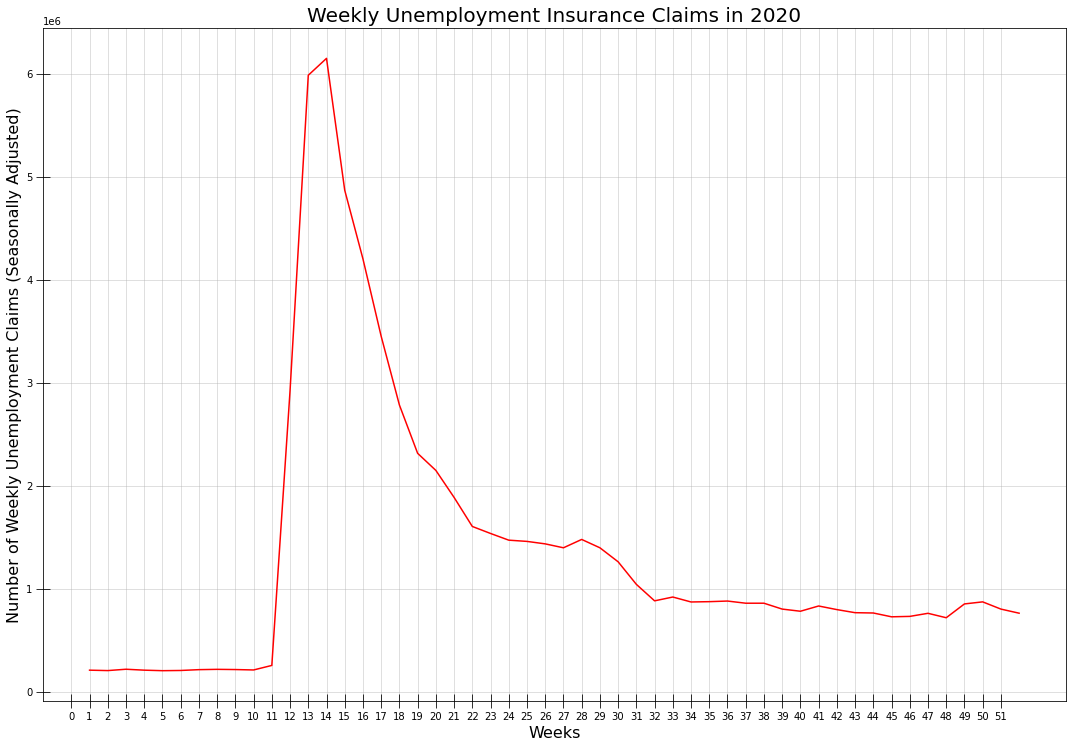

In [257]:
x_UI= week_num
y_UI= new_ui_df['S.A.']

fig = plt.figure(figsize = (15, 20))
fig.add_axes()

ax1 = fig.add_subplot(211)
ax1.plot(x_UI, y_UI, zorder=2, color='red')
ax1.grid(alpha=0.5, zorder=0)
ax1.xaxis.set(ticks=range(len(x_UI)))


ax1.set_xlabel('Weeks', fontsize=16)

ax1.tick_params(axis='y', direction='inout', length=10, size=14)
ax1.tick_params(axis='x', direction='inout', length=10, size=14)
# ax1.set(title="Weekly Unemployment Insurance Claims in 2020")
ax1.set_title('Weekly Unemployment Insurance Claims in 2020', fontsize=20)

ax1.set_ylabel('Number of Weekly Unemployment Claims (Seasonally Adjusted)', fontsize=16)

# plt.gcf().set_size_inches(20,20)
plt.tight_layout()
fig.savefig('2020_Weekly_UI.png', facecolor='w', dpi=600)
plt.show()

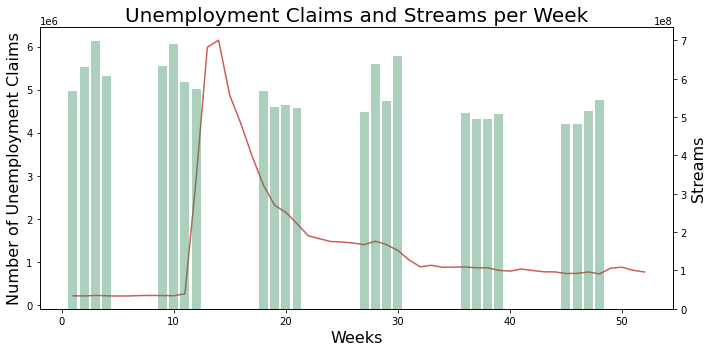

In [269]:
#https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/
x = week_num
x2 = weeks_list
# y-axis values
y1 = new_ui_df['S.A.']
  
# secondary y-axis values
y2 = num_streams
  
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Unemployment Claims and Streams per Week', size=20)
  
# using the twinx() for creating another
# axes object for secondry y-Axis
ax2 = ax.twinx()
ax.plot(x, y1, color = 'indianred', alpha=1)
ax2.bar(x2, y2, color = 'seagreen', alpha=0.4)
  
# giving labels to the axises
ax.set_xlabel('Weeks', size=16)
ax.set_ylabel('Number of Unemployment Claims', size=16)
  
# secondary y-axis label
ax2.set_ylabel('Streams', size=16)
  
# defining display layout 
plt.tight_layout()
  
# show plot


fig.savefig('2020_Weekly_UIvsStreams.png', facecolor='w', dpi=600)
plt.show()